In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
x = torch.tensor([1, 2, 3])
x

tensor([1, 2, 3])

In [4]:
torch.cuda.is_available()

True

In [5]:
x = torch.empty(1)
x

tensor([7.0367e+22])

In [6]:
x = torch.empty(5) # 5 random elements
x

tensor([7.5852e-35, 0.0000e+00, 1.5785e-31, 0.0000e+00, 1.1210e-43])

In [8]:
x = torch.empty(2, 3) # 2, 3, random values
x

tensor([[2.5613e-31, 0.0000e+00, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])

In [10]:
x = torch.empty(4, 3, 2, 5) # 4, 3, 2, 5
x

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  7.1466e-44,  0.0000e+00]],

         [[ 1.4013e-45,  0.0000e+00, -1.7014e+38,  1.1515e-40,  9.1837e-41],
          [ 4.1478e-43,  0.0000e+00,  0.0000e+00,  2.9147e-43,  0.0000e+00]]],


        [[[ 1.5695e-43,  0.0000e+00,  2.5603e-31,  0.0000e+00,  0.0000e+00],
          [ 1.4013e-45,  1.5784e-31,  0.0000e+00, -1.7316e-16,  4.3132e-41]],

         [[ 1.5784e-31,  0.0000e+00,  3.2684e-12,  1.7728e+28,  2.9147e-43],
          [ 0.0000e+00,  3.5873e-43,  3.7779e+22, -1.8378e-16,  4.3132e-41]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  7.1450e+31,  6.1970e-04,  6.0676e-43,  0.0000e+00]]],


        [[[ 2.5715e-31,  0.0000e+00,  2.5729e-31,  0.0000e+0

In [11]:
x = torch.rand(2, 3)
x

tensor([[0.4201, 0.4056, 0.2801],
        [0.5542, 0.9547, 0.3089]])

In [12]:
x = torch.zeros(2, 3)
x

tensor([[0.7189, 0.4025, 0.9483],
        [0.8543, 0.6155, 0.5088]])

In [14]:
x = torch.ones(2, 3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [15]:
x = torch.rand(2, 3)
x.dtype

torch.float32

In [18]:
x = torch.rand(2, 3, dtype=torch.double)
x.dtype

torch.float64

In [19]:
x = torch.rand(2, 3, dtype=torch.float64)
x.dtype

torch.float64

In [20]:
x = torch.rand(2, 3, dtype=torch.float16)
x.size()

torch.Size([2, 3])

In [23]:
x = torch.tensor([2.2, 1.5])
x

tensor([2.2000, 1.5000])

In [26]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
x + y # Element wise addition

tensor([[1.3249, 0.7091],
        [0.9627, 0.9983]])

In [27]:
y.add_(x) # inplace addition in y "_" means inplace=True
y

tensor([[1.3249, 0.7091],
        [0.9627, 0.9983]])

In [28]:
x-y

tensor([[-0.8240, -0.4936],
        [-0.2817, -0.0200]])

In [31]:
y.sub_(x)

tensor([[0.8240, 0.4936],
        [0.2817, 0.0200]])

Same goes for multiplication and division

In [32]:
torch.mul(x, y)

tensor([[0.4127, 0.1064],
        [0.1919, 0.0196]])

In [33]:
torch.div(x, y)

tensor([[ 0.6078,  0.4367],
        [ 2.4170, 48.9372]])

In [36]:
x = torch.rand(5, 3)
x[1:, 0]

tensor([0.6604, 0.9061, 0.1150, 0.6783])

In [40]:
x[2, 1].item()

0.12769865989685059

In [43]:
x = torch.rand(4, 4)
y = x.view(16)
y

tensor([0.3595, 0.9694, 0.6908, 0.6403, 0.3212, 0.9964, 0.4280, 0.0697, 0.7901,
        0.2241, 0.3291, 0.8279, 0.0527, 0.1326, 0.7612, 0.1660])

tensor to numpy array

In [52]:
a = torch.ones(5)
b = a.numpy()
print(type(b))

<class 'numpy.ndarray'>


In [53]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Numpy to Tensor

In [62]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [64]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [65]:
a += 1

In [66]:
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


GPU

In [68]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y # performing in gpu
  z = z.to("cpu") # storing it to cpu

In [71]:
if torch.cuda.is_available():
    x = torch.ones(5, device="cuda")  # on GPU
    y = torch.ones(5, device="cuda")
    z = x + y
    print(z)

tensor([2., 2., 2., 2., 2.], device='cuda:0')


In [72]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 1.4022, -0.1945, -1.0706], requires_grad=True)


In [73]:
y = x + 2
y

tensor([3.4022, 1.8055, 0.9294], grad_fn=<AddBackward0>)

In [74]:
z = y * y * 2
z

tensor([23.1501,  6.5198,  1.7277], grad_fn=<MulBackward0>)

In [76]:
z = z.mean()

In [77]:
z.backward()

In [79]:
x.grad # dz/dx

tensor([4.5363, 2.4074, 1.2392])

In [87]:
x = torch.randn(3, requires_grad=True)
#x.requires_grad_(False)
print(x)

tensor([-0.5590,  0.0711,  0.7328], requires_grad=True)


In [84]:
y = x.detach()
y

tensor([-0.6769, -0.0911, -0.4537])

In [88]:
with torch.no_grad():
  y = x + 2
  print(y)

tensor([1.4410, 2.0711, 2.7328])


In [91]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(4):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])


In [94]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(4):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [98]:
weights = torch.ones(4, requires_grad=True)
optimizer = torch.optim.SGD([weights], lr=0.01)
optimizer.step()
optimizer.zero_grad()

In [100]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = w * x
loss = (y_hat - y) ** 2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights

# continue for some epoch

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [108]:
# input
x = np.array([1, 2, 3, 4], dtype=np.float32)
# output
y = np.array([2, 4, 6, 8], dtype=np.float32)
# initial weights
w = 0.0
# model prediction
def forward(x):
  return w * x
# loss (MSE)
def loss(y, y_pre):
  return ((y_pre - y) ** 2).mean()
# gradients
def gradient(x, y, y_pre):
  return np.dot(2*x, y_pre - y).mean()


learning_rate = 0.01
n_items = 10

for epoch in range(n_items):
  y_pred = forward(x)

  l = loss(y, y_pred)

  dw = gradient(x, y, y_pred)

  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f"Epoch: {epoch + 1} weight: {w}, loss: {l}")

print(f"Prediction after training: {forward(5)}")

Epoch: 1 weight: 1.1999999284744263, loss: 30.0
Epoch: 2 weight: 1.6799999475479126, loss: 4.8000006675720215
Epoch: 3 weight: 1.871999979019165, loss: 0.7680001854896545
Epoch: 4 weight: 1.948799967765808, loss: 0.1228799968957901
Epoch: 5 weight: 1.9795199632644653, loss: 0.019660834223031998
Epoch: 6 weight: 1.9918079376220703, loss: 0.0031457357108592987
Epoch: 7 weight: 1.9967231750488281, loss: 0.000503324146848172
Epoch: 8 weight: 1.9986892938613892, loss: 8.053186320466921e-05
Epoch: 9 weight: 1.9994757175445557, loss: 1.2884394891443662e-05
Epoch: 10 weight: 1.9997903108596802, loss: 2.0613531432900345e-06
Prediction after training: 9.99895191192627


In [109]:
# input
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
# output
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
# initial weights
w = torch.tensor([0.0], dtype= torch.float32, requires_grad=True)
# model prediction
def forward(x):
  return w * x
# loss (MSE)
def loss(y, y_pre):
  return ((y_pre - y) ** 2).mean()

learning_rate = 0.01
n_items = 10

for epoch in range(n_items):
  y_pred = forward(x)

  l = loss(y, y_pred)

  l.backward() # dl/dw

  with torch.no_grad():
    w -= learning_rate * w.grad
  w.grad.zero_()

  if epoch % 1 == 0:
    print(f"Epoch: {epoch + 1} weight: {w}, loss: {l}")

print(f"Prediction after training: {forward(5)}")


Epoch: 1 weight: tensor([0.3000], requires_grad=True), loss: 30.0
Epoch: 2 weight: tensor([0.5550], requires_grad=True), loss: 21.674999237060547
Epoch: 3 weight: tensor([0.7717], requires_grad=True), loss: 15.660187721252441
Epoch: 4 weight: tensor([0.9560], requires_grad=True), loss: 11.314486503601074
Epoch: 5 weight: tensor([1.1126], requires_grad=True), loss: 8.17471694946289
Epoch: 6 weight: tensor([1.2457], requires_grad=True), loss: 5.9062323570251465
Epoch: 7 weight: tensor([1.3588], requires_grad=True), loss: 4.2672529220581055
Epoch: 8 weight: tensor([1.4550], requires_grad=True), loss: 3.083089828491211
Epoch: 9 weight: tensor([1.5368], requires_grad=True), loss: 2.227532148361206
Epoch: 10 weight: tensor([1.6063], requires_grad=True), loss: 1.609391689300537
Prediction after training: tensor([8.0313], grad_fn=<MulBackward0>)


In [116]:
# input
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
# output
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = x.shape

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(11):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward() # dl/dw

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 1 == 0:
    [w, b] =  model.parameters()
    print(f"Epoch: {epoch + 1} weight: {w.item()}, loss: {l}")

print(f"Prediction after training: {forward(5).item()}")


Epoch: 1 weight: 0.5497327446937561, loss: 28.33319091796875
Epoch: 2 weight: 0.792330801486969, loss: 19.65980339050293
Epoch: 3 weight: 0.994412362575531, loss: 13.641525268554688
Epoch: 4 weight: 1.1627439260482788, loss: 9.465568542480469
Epoch: 5 weight: 1.302961826324463, loss: 6.567959785461426
Epoch: 6 weight: 1.419761300086975, loss: 4.557370662689209
Epoch: 7 weight: 1.517053484916687, loss: 3.162266492843628
Epoch: 8 weight: 1.5980961322784424, loss: 2.1942319869995117
Epoch: 9 weight: 1.6656029224395752, loss: 1.5225324630737305
Epoch: 10 weight: 1.7218345403671265, loss: 1.0564557313919067
Epoch: 11 weight: 1.7686740159988403, loss: 0.7330551147460938
Prediction after training: 8.84337043762207


In [118]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

Linear regression

In [19]:
# prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20)
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)
n_samples, n_features = X.shape
# design the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
# loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training
for epoch in range(100):
  y_pred = model(X)
  loss = criterion(y_pred, Y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f"Loss: {loss}, Epoch: {epoch}")

Loss: 4484.01123046875, Epoch: 0
Loss: 4318.765625, Epoch: 1
Loss: 4160.0537109375, Epoch: 2
Loss: 4007.616943359375, Epoch: 3
Loss: 3861.207763671875, Epoch: 4
Loss: 3720.5869140625, Epoch: 5
Loss: 3585.525390625, Epoch: 6
Loss: 3455.802490234375, Epoch: 7
Loss: 3331.207275390625, Epoch: 8
Loss: 3211.53662109375, Epoch: 9
Loss: 3096.595703125, Epoch: 10
Loss: 2986.197509765625, Epoch: 11
Loss: 2880.160888671875, Epoch: 12
Loss: 2778.31494140625, Epoch: 13
Loss: 2680.492919921875, Epoch: 14
Loss: 2586.535888671875, Epoch: 15
Loss: 2496.2900390625, Epoch: 16
Loss: 2409.610107421875, Epoch: 17
Loss: 2326.353271484375, Epoch: 18
Loss: 2246.38525390625, Epoch: 19
Loss: 2169.575439453125, Epoch: 20
Loss: 2095.79931640625, Epoch: 21
Loss: 2024.9365234375, Epoch: 22
Loss: 1956.871826171875, Epoch: 23
Loss: 1891.49462890625, Epoch: 24
Loss: 1828.6986083984375, Epoch: 25
Loss: 1768.3818359375, Epoch: 26
Loss: 1710.4462890625, Epoch: 27
Loss: 1654.7972412109375, Epoch: 28
Loss: 1601.344970703125

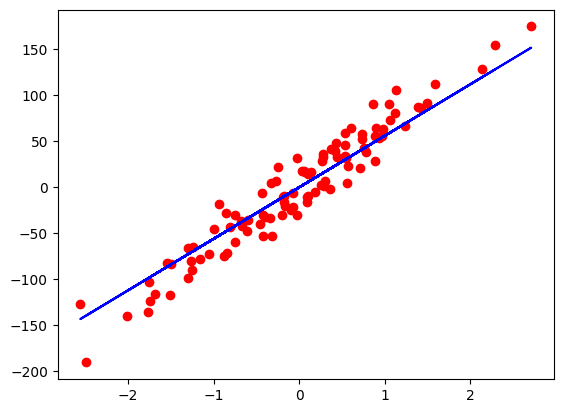

In [20]:
prediction = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, prediction, 'b')
plt.show()

Logistic Regression

In [71]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [72]:
n_samples, n_features = X.shape

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [76]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [77]:
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.Linear = nn.Linear(n_input_features, 1)
  def forward(self, x):
    y_pred = torch.sigmoid(self.Linear(x))
    return y_pred

In [78]:
model = LogisticRegression(n_features)

In [79]:
creation = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [80]:
for epoch in range(100):
  y_pred = model(X_train)
  loss = creation(y_pred, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f"Epoch: {epoch+1}, Loss: {loss}")

Epoch: 1, Loss: 0.7546760439872742
Epoch: 2, Loss: 0.7320072650909424
Epoch: 3, Loss: 0.7106934189796448
Epoch: 4, Loss: 0.690662682056427
Epoch: 5, Loss: 0.6718408465385437
Epoch: 6, Loss: 0.654152512550354
Epoch: 7, Loss: 0.6375229358673096
Epoch: 8, Loss: 0.6218795776367188
Epoch: 9, Loss: 0.6071525812149048
Epoch: 10, Loss: 0.5932757258415222
Epoch: 11, Loss: 0.5801867842674255
Epoch: 12, Loss: 0.5678277015686035
Epoch: 13, Loss: 0.5561445355415344
Epoch: 14, Loss: 0.5450872778892517
Epoch: 15, Loss: 0.5346102118492126
Epoch: 16, Loss: 0.5246708393096924
Epoch: 17, Loss: 0.5152303576469421
Epoch: 18, Loss: 0.5062534213066101
Epoch: 19, Loss: 0.49770718812942505
Epoch: 20, Loss: 0.48956188559532166
Epoch: 21, Loss: 0.4817899465560913
Epoch: 22, Loss: 0.4743664562702179
Epoch: 23, Loss: 0.4672682583332062
Epoch: 24, Loss: 0.4604742228984833
Epoch: 25, Loss: 0.45396479964256287
Epoch: 26, Loss: 0.44772228598594666
Epoch: 27, Loss: 0.4417300522327423
Epoch: 28, Loss: 0.4359730184078216

In [ ]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f"Accuracy: {acc.item()*100}")

Accuracy: 97.36841917037964
